In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import warnings
warnings.filterwarnings('ignore')

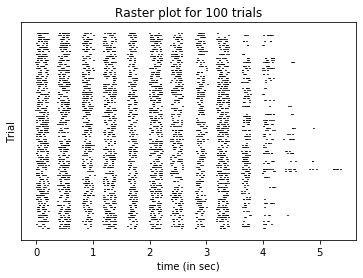

In [2]:
spike_times = np.loadtxt('SpikeTimes.dat')
# 100 spike time indices of 100 trials

#Transpose the matrix into NXM so that each row represents each trials , this is done for my own comfort
spike_times_records = spike_times.T

lineoffset = 1
offset = .0002
for i in range(100):
    x = spike_times_records[i,:]
    x = x[~np.isnan(x)]
    plt.eventplot(x*10**-3, colors='black', lineoffsets=lineoffset,linelengths=0.0001)
    lineoffset = lineoffset+offset
plt.yticks([])
plt.title('Raster plot for 100 trials')
plt.xlabel('time (in sec)')
plt.ylabel('Trial')
plt.show()


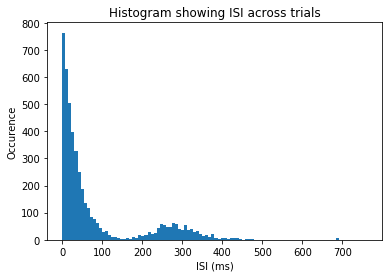

In [3]:
isi = np.diff(spike_times, axis=0)
isi_flattened = isi[~np.isnan(isi)]
plt.hist(isi_flattened,100)
plt.title('Histogram showing ISI across trials')
plt.xlabel('ISI (ms)')
plt.ylabel('Occurence')
plt.show()

There is a decay of interspike interval with a small increase acround 200-400 ms range.

In [4]:
cv = np.std(isi_flattened) / np.mean(isi_flattened)
print("The CV is {}".format(cv))

The CV is 1.3537882337148048


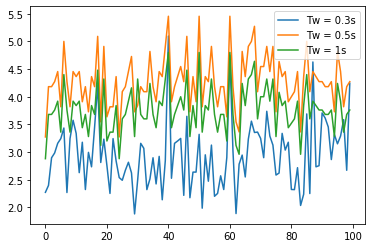

In [5]:
                
def trial_resolved_fano_factor(tw, spikes,trial_length):
    tW = tw*10000
    no_of_windows = int(trial_length*10000/tW)
    no_of_trials = int(spikes.shape[1])
    fano_factor = []
    for trial in range(no_of_trials):
        spike_counts = []
        current_spikes = spikes[:,trial]
        current_spikes = current_spikes[~np.isnan(current_spikes)]
        for i in range(int(no_of_windows)):
            start_index = i*tW
            end_index = (i+1)*tW - 1
            spike_count = np.sum(np.logical_and(current_spikes >= start_index, current_spikes <= end_index))
            spike_counts.append(spike_count)
        fano_factor.append(np.var(spike_counts) / np.mean(spike_counts))
    return fano_factor

tw = [0.3,0.5,1]
ff = trial_resolved_fano_factor(0.3,spike_times,5.5)
plt.plot(np.array(ff)*0.1, label = 'Tw = 0.3s')
ff01 = trial_resolved_fano_factor(0.5,spike_times,5.5)
plt.plot(np.array(ff01)*0.1, label = 'Tw = 0.5s')
ff02 = trial_resolved_fano_factor(1,spike_times,5.5)
plt.plot(np.array(ff02)*0.1, label = 'Tw = 1s')
plt.legend()
plt.show()

(0, 6)

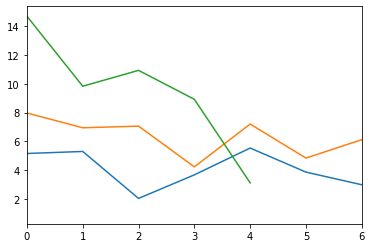

In [6]:
spike_times_array = spike_times.T
spikes = np.zeros((100, int(5.5 * 10000)))
 
#converted to remove nan
for i in np.arange(0, 100, 1) :
    for element in spike_times_array[i,:]*10:
        if ~(np.isnan(element)):
            spikes[i, int(element)] = 1

def time_resolved_fano_factor(no_of_trials, trial_length, width, spikes):
    window_size = int(width * 10000)
    no_of_windows = int(trial_length *10000 / window_size) 
    counts = np.zeros((no_of_trials, no_of_windows))
    for trial in np.arange(0, no_of_windows, 1):
        for win in np.arange(0, no_of_windows, 1):
            counts[trial, win] = np.sum(spikes[trial, window_size * win : window_size * (win+1)])
    return counts

count_array = time_resolved_fano_factor(100, 5.5, 0.3, spikes)
ff = np.var(count_array, axis=0) / np.mean(count_array, axis=0)
plt.plot(ff)

count_array = time_resolved_fano_factor(100, 5.5, 0.5, spikes)
ff = np.var(count_array, axis=0) / np.mean(count_array, axis=0)
plt.plot(ff)

count_array = time_resolved_fano_factor(100, 5.5, 1, spikes)
ff = np.var(count_array, axis=0) / np.mean(count_array, axis=0)
plt.plot(ff)
plt.xlim(0,6)

**2**

In [74]:
def spike_train(num_trials, trial_dur, resolution, spikes_time_array):
    ind_res = 1/resolution
    spikes = np.zeros((num_trials, int(trial_dur * ind_res)))
    for i in np.arange(0, num_trials, 1) :
        for element in spikes_time_array[i,:]* ind_res:
            if ~(np.isnan(element)):
                spikes[i, int(element)] = 1
    return spikes

In [7]:
data = loadmat('PoissonSpikeTrains.mat')
spike_times_hom = data['SpikeTimes_hom']
spike_times_inhom = data['SpikeTimes_inh']
spike_times_ref = data['SpikeTimes_ref']
rates_ref = data['rates_ref']

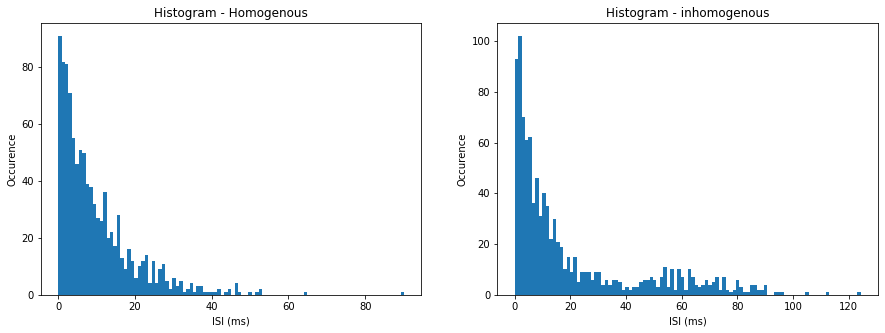

In [8]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))
isi = np.diff(spike_times_hom[0], axis=0)
isi_flattened = isi[~np.isnan(isi)]
plt.sca(ax1)
plt.hist(isi_flattened,100)
plt.title('Histogram - Homogenous')
plt.xlabel('ISI (ms)')
plt.ylabel('Occurence')

isi = np.diff(spike_times_inhom[0], axis=0)
isi_flattened = isi[~np.isnan(isi)]
plt.sca(ax2)
plt.hist(isi_flattened,100)
plt.title('Histogram - inhomogenous')
plt.xlabel('ISI (ms)')
plt.ylabel('Occurence')
plt.show()

For homogenous distribution, there is only decay. 
Whereas, for inhomogenous distributios, we see a similar pattern as q1.

In [9]:
isi = np.diff(spike_times_hom[0], axis=0)
isi_flattened = isi[~np.isnan(isi)]  # omit nan values
cv = np.std(isi_flattened) / np.mean(isi_flattened)
print("CV for homogenous data: {}".format(cv))

isi = np.diff(spike_times_inhom[0], axis=0)
isi_flattened = isi[~np.isnan(isi)]  # omit nan values
cv = np.std(isi_flattened) / np.mean(isi_flattened)
print("CV for inhomogenous data: {}".format(cv))

CV for homogenous data: 1.0126965180137786
CV for inhomogenous data: 1.180574287301639


In [10]:
tW = 100*10 #considering resolution
no_of_window = 10000/1000
spike_counts = []
for i in range(int(no_of_window-1)):
    start_index = i*1000
    end_index = (i+1)*1000 - 1
    spike_count = np.sum(np.logical_and(spike_times_hom[0] >= start_index, spike_times_hom[0] <= end_index))
    spike_counts.append(spike_count)
fano_factor = np.var(spike_counts) / np.mean(spike_counts)
print("Faco factor for homogenous data : {}".format(fano_factor))

Faco factor for homogenous data : 0.6251526251526252


In [11]:
tW = 100*10 #considering resolution
no_of_window = 20000/1000
spike_counts = []
for i in range(int(no_of_window-1)):
    start_index = i*1000
    end_index = (i+1)*1000 - 1
    spike_count = np.sum(np.logical_and(spike_times_inhom[0] >= start_index, spike_times_inhom[0] <= end_index))
    spike_counts.append(spike_count)
fano_factor = np.var(spike_counts) / np.mean(spike_counts)
print("Faco factor for inhomogenous data : {}".format(fano_factor))

Faco factor for inhomogenous data : 0.855165485293297


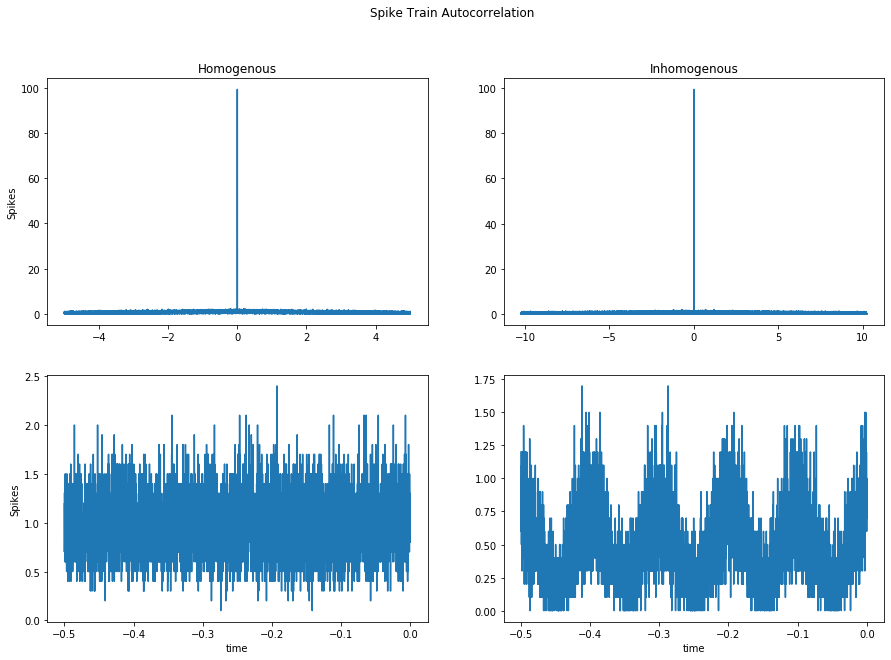

In [83]:
spike_time_hom = np.round(spike_times_hom, 1) / 1000
spike_time_inh = np.round(spike_times_inhom, 1) / 1000

trial_duration_hom = 10
trial_duration_inh = 20.5

spikes_hom = spike_train(num_trials = 1, trial_dur = trial_duration_hom, resolution = 0.1/1000, spikes_time_array = spike_time_hom)
spikes_inh = spike_train(num_trials = 1, trial_dur = trial_duration_inh, resolution = 0.1/1000, spikes_time_array = spike_time_inh)

bin_size = 0.1 #seconds
autocorrelation_hom = np.correlate(spikes_hom[0,:], spikes_hom[0,:], mode='same') * bin_size
autocorrelation_inh = np.correlate(spikes_inh[0,:], spikes_inh[0,:], mode='same') * bin_size

time_hom = np.arange(-trial_duration_hom/2, trial_duration_hom/2., 0.0001)
time_inh = np.arange(-trial_duration_inh/2, trial_duration_inh/2., 0.0001)

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))

ax[0,0].plot(time_hom, autocorrelation_hom)
ax[1,0].plot(time_hom[45000:50000], autocorrelation_hom[45000:50000])
ax[0,0].set_title('Homogenous')
ax[0,0].set_ylabel('Spikes')
ax[1,0].set_ylabel('Spikes')
ax[1,0].set_xlabel('time')
ax[1,1].set_xlabel('time')
ax[0,1].plot(time_inh, autocorrelation_inh)
ax[1,1].plot(time_inh[97500:102500], autocorrelation_inh[97500:102500])
ax[0,1].set_title('Inhomogenous')

plt.suptitle('Spike Train Autocorrelation')
plt.show()

There is a difference between computed and analytical value as the distribution is not completely poisson distribution.

**3**

In [13]:
spike_times_ref = spike_times_ref.T

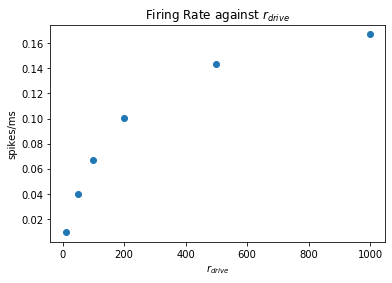

In [18]:
firing_rate = []
#finding the firing rate by inverse of interspike interval
for trial in range(6):
    #calculate interspike interval
    ISI = np.diff(spike_times_ref[trial,:])
    #mean of ISI
    ISI_mean = np.mean(ISI)
    #inverse of ISI
    firing_rate.append(1/ISI_mean)
firing_rate = np.array(firing_rate)
np.shape(firing_rate)
plt.plot(rates_ref[0], firing_rate, 'o')   
plt.title('Firing Rate against $r_{drive}$')
plt.ylabel('spikes/ms')
plt.xlabel('$r_{drive}$')
plt.show()

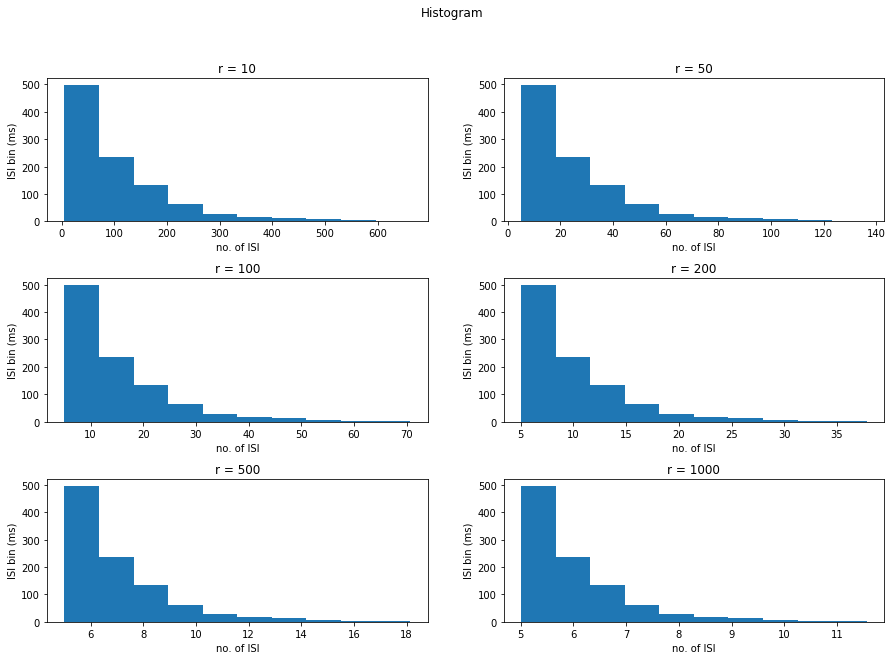

In [39]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4)
plt.sca(axes[0,0])
plt.hist(np.diff(spike_times_ref[0,:]))
plt.xlabel('no. of ISI')
plt.ylabel('ISI bin (ms)')
plt.title('r = {}'.format(rates_ref[0][0]))

plt.sca(axes[0,1])
plt.hist(np.diff(spike_times_ref[1,:]))
plt.xlabel('no. of ISI')
plt.ylabel('ISI bin (ms)')
plt.title('r = {}'.format(rates_ref[0][1]))

plt.sca(axes[1,0])
plt.hist(np.diff(spike_times_ref[2,:]))
plt.xlabel('no. of ISI')
plt.ylabel('ISI bin (ms)')
plt.title('r = {}'.format(rates_ref[0][2]))

plt.sca(axes[1,1])
plt.hist(np.diff(spike_times_ref[3,:]))
plt.xlabel('no. of ISI')
plt.ylabel('ISI bin (ms)')
plt.title('r = {}'.format(rates_ref[0][3]))

plt.sca(axes[2,0])
plt.hist(np.diff(spike_times_ref[4,:]))
plt.xlabel('no. of ISI')
plt.ylabel('ISI bin (ms)')
plt.title('r = {}'.format(rates_ref[0][4]))

plt.sca(axes[2,1])
plt.hist(np.diff(spike_times_ref[5,:]))
plt.xlabel('no. of ISI')
plt.ylabel('ISI bin (ms)')
plt.title('r = {}'.format(rates_ref[0][5]))

plt.suptitle('Histogram')
plt.show()

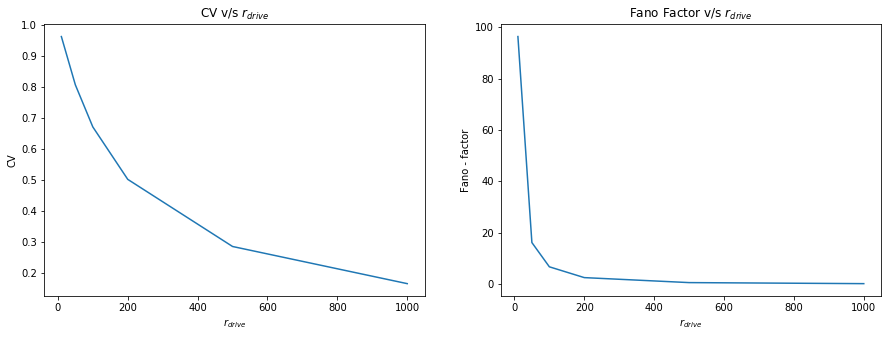

In [69]:
cvs = []
ffs = []
for i in range(6):
    n = np.diff(spike_times_ref[i,:])
    cv = np.std(n) / np.mean(n)
    cvs.append(cv)
    ff = np.std(n)**2/np.mean(n)
    ffs.append(ff)
cvs = np.array(cvs)
ffs = np.array(ffs)

fig, (ax01, ax02) = plt.subplots(1, 2, figsize=(15, 5))
plt.sca(ax01)
plt.plot(rates_ref[0], cvs)
plt.title('CV v/s $r_{drive}$')
plt.xlabel('$r_{drive}$')
plt.ylabel('CV')

plt.sca(ax02)
plt.plot(rates_ref[0], ffs)
plt.title('Fano Factor v/s $r_{drive}$')
plt.xlabel('$r_{drive}$')
plt.ylabel('Fano - factor')

plt.show()   

In [71]:
plt.sca(ax1)
isi_hist = np.histogram(spike_times_hom.flatten(), 100)[0]
plt.plot(np.correlate(isi_hist, isi_hist, mode = 'full'))
plt.ylabel('Autocorrelation')
plt.title('Homogenous data')
plt.xlabel('t / ms')

plt.sca(ax2)
isi_hist = np.histogram(spike_times_inhom.flatten(), 50)[0]
plt.plot(np.correlate(isi_hist, isi_hist, mode = 'same')*0.1)
plt.ylabel('Autocorrelation')
plt.title('Inhomogenous data')
plt.xlabel('t / ms')
plt.show()

16.15470855340377
